In [2]:
# !pip install paddleocr
# !pip install paddlepaddle
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install shapely
# !pip install networkx
# !pip install random
# !pip install ollama

In [3]:
from PIL import Image
import numpy as np

# Ouvrir et convertir en RGB
img = Image.open("ch_0_2.jpg").convert("RGB")

# Redimensionner si un côté dépasse 4000 px
max_side = 2500
w, h = img.size
scale = min(max_side / w, max_side / h, 1.0)
new_size = (int(w * scale), int(h * scale))
img_resized = img.resize(new_size, Image.Resampling.LANCZOS)

# Sauvegarder l'image redimensionnée
img_np = np.array(img_resized)


In [4]:
# from PIL import Image
# import numpy as np

# def resize_image(img_path, max_side):
#     """
#     Redimensionne une image pour que son plus grand côté <= max_side.
#     Retourne :
#         - l'image redimensionnée en numpy.ndarray (RGB)
#         - le facteur de réduction (ex: 2.0 signifie divisée par 2)
#     """
#     # Ouvrir et convertir en RGB
#     img = Image.open(img_path).convert("RGB")
    
#     # Dimensions originales
#     w, h = img.size
    
#     # Calcul du facteur de réduction
#     scale = min(max_side / w, max_side / h, 1.0)
    
#     # Nouvelle taille
#     new_size = (int(w * scale), int(h * scale))
#     img_resized = img.resize(new_size, Image.Resampling.LANCZOS)
    
#     # Facteur : combien l'image a été réduite (w / new_w)
#     reduction_factor = w / new_size[0]
    
#     return np.array(img_resized), reduction_factor

# # Exemple d'utilisation
# img_np, factor = resize_image("ch_16_4.jpg", 2500)
# print(f"Image réduite par un facteur de {factor}")
# print(f"Taille finale : {img_np.shape[1]}x{img_np.shape[0]}")


In [5]:
# Initialize PaddleOCR instance
from paddleocr import PaddleOCR
ocr = PaddleOCR(
    use_doc_orientation_classify=False,
    use_doc_unwarping=False,
    use_textline_orientation=False,
    lang='en')

# Run OCR inference on a sample image 
result = ocr.predict(
    input=img_np)  # Change to your image path

# Visualize the results and save the JSON results
for res in result:
    res.print()
    res.save_to_img("output")
    res.save_to_json("output")

c:\Users\teo\miniconda3\envs\traductionBD\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\teo\miniconda3\envs\traductionBD\Lib\site-packages\paddle\utils\cpp_extension\extension_utils.py:715: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
Creating model: ('PP-OCRv5_server_det', None)
Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in C:\Users\teo\.paddlex\official_models.
Fetching 6 files: 100%|██████████| 6/6 [00:00<00:00, 507.50it/s]
Creating model: ('PP-OCRv5_server_rec', None)
Using official model (PP-OCRv5_server_rec), the model files will be automatically download

In [6]:
result

[{'input_path': None,
  'page_index': None,
  'doc_preprocessor_res': {'input_path': None,
   'page_index': None,
   'input_img': array([[[1, ..., 1],
           ...,
           [1, ..., 1]],
   
          ...,
   
          [[1, ..., 1],
           ...,
           [1, ..., 1]]], shape=(2500, 117, 3), dtype=uint8),
   'model_settings': {'use_doc_orientation_classify': False,
    'use_doc_unwarping': False},
   'angle': -1,
   'rot_img': array([[[1, ..., 1],
           ...,
           [1, ..., 1]],
   
          ...,
   
          [[1, ..., 1],
           ...,
           [1, ..., 1]]], shape=(2500, 117, 3), dtype=uint8),
   'output_img': array([[[1, ..., 1],
           ...,
           [1, ..., 1]],
   
          ...,
   
          [[1, ..., 1],
           ...,
           [1, ..., 1]]], shape=(2500, 117, 3), dtype=uint8)},
  'dt_polys': [array([[ 21,  96],
          ...,
          [ 21, 128]], shape=(4, 2), dtype=int16),
   array([[ 33, 266],
          ...,
          [ 33, 276]], shape=(

In [7]:
def extract_text_from_image(image_path):
    ocr = PaddleOCR(
        use_doc_orientation_classify=False,
        use_doc_unwarping=False,
        use_textline_orientation=False,
        lang='fr')
    result = ocr.predict(
        input=image_path)

    return result

In [8]:
result

[{'input_path': None,
  'page_index': None,
  'doc_preprocessor_res': {'input_path': None,
   'page_index': None,
   'input_img': array([[[1, ..., 1],
           ...,
           [1, ..., 1]],
   
          ...,
   
          [[1, ..., 1],
           ...,
           [1, ..., 1]]], shape=(2500, 117, 3), dtype=uint8),
   'model_settings': {'use_doc_orientation_classify': False,
    'use_doc_unwarping': False},
   'angle': -1,
   'rot_img': array([[[1, ..., 1],
           ...,
           [1, ..., 1]],
   
          ...,
   
          [[1, ..., 1],
           ...,
           [1, ..., 1]]], shape=(2500, 117, 3), dtype=uint8),
   'output_img': array([[[1, ..., 1],
           ...,
           [1, ..., 1]],
   
          ...,
   
          [[1, ..., 1],
           ...,
           [1, ..., 1]]], shape=(2500, 117, 3), dtype=uint8)},
  'dt_polys': [array([[ 21,  96],
          ...,
          [ 21, 128]], shape=(4, 2), dtype=int16),
   array([[ 33, 266],
          ...,
          [ 33, 276]], shape=(

In [9]:
import pandas as pd
result[0]["rec_polys"]
def ocr_results_to_dataframe(ocr_results):
    data = []
    for line in ocr_results:
        for word_info in line:
            bbox = word_info[0]             # coordonnées de la boîte [x1,y1,x2,y2,...]
            text, score = word_info[1]      # texte et confiance
            data.append({"text": text, "confidence": score, "bbox": bbox})
    
    df = pd.DataFrame(data)
    return df


In [10]:
import pandas as pd

def ocr_results_to_dataframe(result):
    """
    Transforme la sortie PaddleOCR en DataFrame pandas.
    
    Paramètre:
        result : sortie de ocr.predict()
        
    Retourne:
        df : pandas.DataFrame avec colonnes ['text', 'poly', 'score', 'box']
    """
    df = pd.DataFrame({
        "text": result[0]["rec_texts"],
        "poly": result[0]["rec_polys"],
        "score": result[0]["rec_scores"],
        "box": result[0]["rec_boxes"]
    })
    
    return df


In [11]:
import pandas as pd

def ocr_results_to_dataframe(result):
    texts = result[0]["rec_texts"]
    polys = result[0]["rec_polys"]
    scores = result[0]["rec_scores"]
    
    data = []
    for i in range(len(texts)):
        if len(polys[i]) != 4:
            raise ValueError(f"Le polygone de la ligne {i} a {len(polys[i])} points au lieu de 4")
        
        row = {"text": texts[i], "score": scores[i]}
        for j, point in enumerate(polys[i]):
            row[f"x{j+1}"] = point[0]
            row[f"y{j+1}"] = point[1]
        data.append(row)
    
    df = pd.DataFrame(data)
    return df


In [12]:
df = ocr_results_to_dataframe(result)

In [13]:
def filter_by_score(df, min_score=0.5):
    df_filtered = df[df['score'] >= min_score].reset_index(drop=True)
    return df_filtered


In [14]:
filter_by_score(df, min_score=0.5)

,text,score,x1,y1,x2,y2,x3,y3,x4,y4
0,MURIM,0.999151,21,96,98,96,98,128,21,128
1,FIR WOR THE FOREST,0.752945,33,266,82,266,82,276,33,276
2,THET RLACES WORD,0.760993,36,259,80,259,80,269,36,269
3,MARTAT,0.626110,44,274,72,274,72,281,44,281
4,THEY SAR TO,0.881353,16,1579,55,1582,54,1596,15,1593
5,TE SKES WITH,0.863846,16,1591,55,1591,55,1602,16,1602
6,ONE JIMP,0.803107,21,1599,49,1599,49,1610,21,1610
7,TE LIT WITEA,0.572939,61,1948,101,1948,101,1958,61,1958
8,SNRESWR,0.609166,64,1956,95,1956,95,1963,64,1963
9,BUT THE FIRST CAUSE,0.963559,26,2054,92,2054,92,2064,26,2064


In [15]:
from shapely.geometry import Polygon
import networkx as nx

def cluster_polygons(polys_points, margin_factor=0.1):
    """
    Cluster des polygones en fonction de leur chevauchement.
    La marge autour de chaque polygone est proportionnelle à sa taille.
    
    Parameters:
    - polys_points: liste de np.array, chaque array contient les points (x, y) du polygone
    - margin_factor: float, fraction de la "taille" du polygone utilisée comme marge
    
    Returns:
    - clusters: liste de sets, chaque set contient les indices des polygones du cluster
    """
    
    polygons = [Polygon(p) for p in polys_points]
    
    # Agrandir chaque polygone proportionnellement à sa taille
    polygons_expanded = []
    for poly in polygons:
        size = poly.area**0.5  # racine carrée de l'aire comme mesure de taille
        margin = size * margin_factor
        polygons_expanded.append(poly.buffer(margin))
    
    # Construire le graphe
    G = nx.Graph()
    G.add_nodes_from(range(len(polygons_expanded)))
    
    for i in range(len(polygons_expanded)):
        for j in range(i+1, len(polygons_expanded)):
            if polygons_expanded[i].intersects(polygons_expanded[j]):
                G.add_edge(i, j)
    
    clusters = list(nx.connected_components(G))
    return clusters


In [16]:
cluster_polygons(result[0]["rec_polys"], margin_factor=0.1)

[{0},
 {1, 2, 3},
 {4},
 {5, 6, 7},
 {8, 9, 10},
 {11, 12, 13, 14},
 {15, 16, 17},
 {18, 19, 20}]

In [17]:
from shapely.geometry import Polygon
import networkx as nx

def cluster_polygons(df, *coord_cols, margin_factor=0.1):

    if len(coord_cols) % 2 != 0:
        raise ValueError("Il faut un nombre pair de colonnes pour former les points (x, y).")
    
    n_points = len(coord_cols) // 2
    polys_points = []
    
    for idx, row in df.iterrows():
        points = []
        for i in range(n_points):
            x_col = coord_cols[2*i]
            y_col = coord_cols[2*i + 1]
            points.append([row[x_col], row[y_col]])
        polys_points.append(points)
    
    polygons = [Polygon(p) for p in polys_points]
    
    # Agrandir chaque polygone proportionnellement à sa taille
    polygons_expanded = []
    for poly in polygons:
        size = poly.area**0.5
        margin = size * margin_factor
        polygons_expanded.append(poly.buffer(margin))
    
    # Construire le graphe
    G = nx.Graph()
    G.add_nodes_from(range(len(polygons_expanded)))
    
    for i in range(len(polygons_expanded)):
        for j in range(i+1, len(polygons_expanded)):
            if polygons_expanded[i].intersects(polygons_expanded[j]):
                G.add_edge(i, j)
    
    clusters = list(nx.connected_components(G))
    return clusters


In [18]:
clusters = cluster_polygons(df, "x1","y1","x2","y2","x3","y3","x4","y4", margin_factor=0.1)

In [19]:
import matplotlib.pyplot as plt
import random
from shapely.geometry import Polygon

def draw_clusters_from_df(df, *coord_cols, margin_factor=0.1, dpi=600, linewidth=0.2):
    """
    Dessine des polygones groupés par cluster à partir d'un DataFrame.
    
    Chaque polygone est dessiné deux fois : original et agrandi avec une marge proportionnelle à sa taille.
    
    Parameters:
    - df: pandas.DataFrame contenant les colonnes de coordonnées
    - *coord_cols: noms des colonnes (x1, y1, x2, y2, ...)
    - margin_factor: float, fraction de la "taille" du polygone utilisée comme marge
    - dpi: résolution de l'image
    - linewidth: épaisseur des traits
    """
    # Construire la liste de polygones à partir du DataFrame
    n_points = len(coord_cols) // 2
    polys_points = []
    for idx, row in df.iterrows():
        points = []
        for i in range(n_points):
            x_col = coord_cols[2*i]
            y_col = coord_cols[2*i + 1]
            points.append([row[x_col], row[y_col]])
        polys_points.append(points)
    
    # Clustering
    clusters = cluster_polygons(df, *coord_cols, margin_factor=margin_factor)
    
    plt.figure(figsize=(12, 12), dpi=dpi)
    ax = plt.gca()
    
    # Convertir chaque polygone pour matplotlib
    polys = [Polygon(p) for p in polys_points]
    
    # Dessiner chaque cluster avec une couleur différente
    for cluster in clusters:
        color = [random.random() for _ in range(3)]
        for idx in cluster:
            poly = polys[idx]
            # Polygon original
            ax.add_patch(plt.Polygon(list(poly.exterior.coords), fill=False, edgecolor=color, linewidth=linewidth))
            
            # Polygon agrandi avec marge proportionnelle à sa taille
            size = poly.area**0.5
            margin = size * margin_factor
            poly_buffered = poly.buffer(margin)
            ax.add_patch(plt.Polygon(list(poly_buffered.exterior.coords), fill=False, edgecolor=color, linestyle='--', linewidth=linewidth))
    
    # Ajuster limites
    all_x = [pt[0] for p in polys_points for pt in p]
    all_y = [pt[1] for p in polys_points for pt in p]
    ax.set_xlim(min(all_x) - 50, max(all_x) + 50)
    ax.set_ylim(min(all_y) - 50, max(all_y) + 50)
    ax.invert_yaxis()
    
    ax.set_aspect('equal')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Clusters de polygones (plein = original, tireté = agrandi)')
    plt.show()


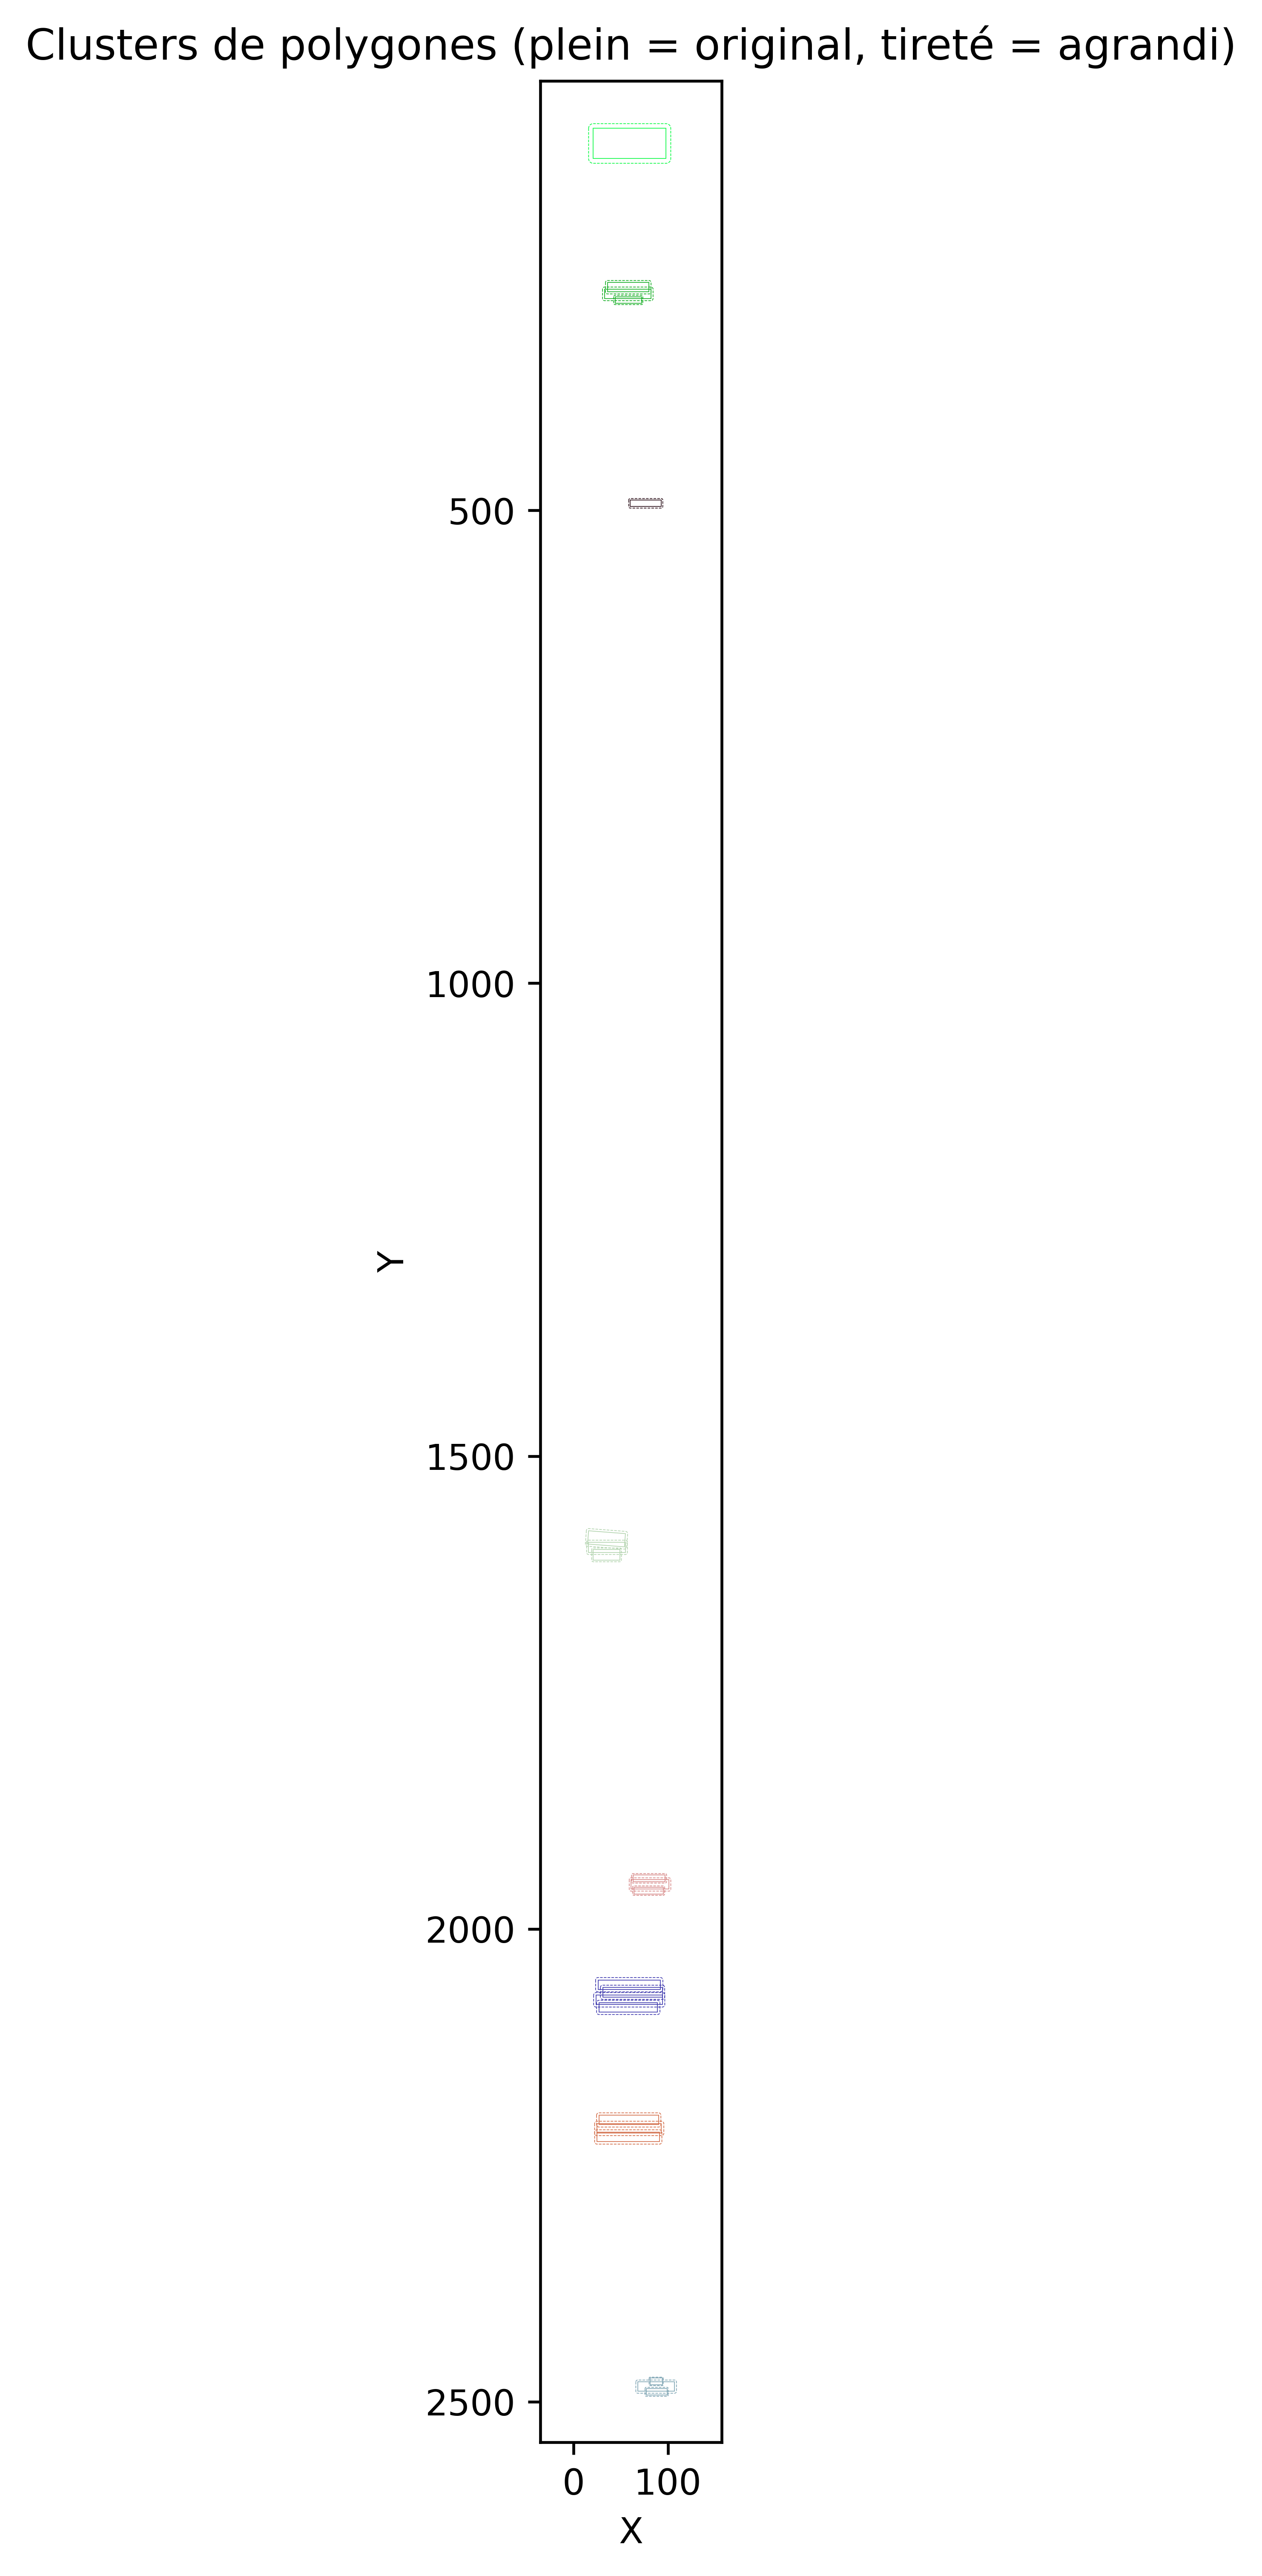

In [20]:
draw_clusters_from_df(df, "x1","y1","x2","y2","x3","y3","x4","y4", margin_factor=0.1)


In [21]:
def add_cluster_column(df, clusters):
    """
    Ajoute une colonne 'cluster' au DataFrame à partir de la liste de clusters.

    Parameters:
    - df: pandas.DataFrame
    - clusters: liste de sets, chaque set contient les indices des polygones dans ce cluster

    Returns:
    - df_copy: DataFrame avec une colonne 'cluster'
    """
    df_copy = df.copy()
    cluster_col = [-1] * len(df_copy)  # valeur par défaut pour les lignes non assignées

    for cluster_idx, cluster in enumerate(clusters):
        for row_idx in cluster:
            cluster_col[row_idx] = cluster_idx

    df_copy['cluster'] = cluster_col
    return df_copy


In [22]:
df = add_cluster_column(df, clusters)

In [23]:
import pandas as pd

def bounding_boxes_by_cluster(df):
    """
    Pour chaque cluster, crée un rectangle englobant qui contient tous les polygones du cluster.
    
    Parameters:
    - df : DataFrame avec colonnes ['x1','y1','x2','y2','x3','y3','x4','y4','cluster']
    
    Returns:
    - df_boxes : DataFrame avec ['cluster', 'x_min', 'y_min', 'x_max', 'y_max']
    """
    clusters = df['cluster'].unique()
    data = []

    for clus in clusters:
        df_clus = df[df['cluster'] == clus]
        # Récupérer toutes les coordonnées x et y
        xs = df_clus[['x1','x2','x3','x4']].values.flatten()
        ys = df_clus[['y1','y2','y3','y4']].values.flatten()
        
        x_min, x_max = xs.min(), xs.max()
        y_min, y_max = ys.min(), ys.max()
        
        data.append({
            'cluster': clus,
            'x_min': x_min,
            'y_min': y_min,
            'x_max': x_max,
            'y_max': y_max
        })
    
    df_boxes = pd.DataFrame(data)
    return df_boxes


In [24]:
df_boxes = bounding_boxes_by_cluster(df)

In [25]:
df_boxes

,cluster,x_min,y_min,x_max,y_max
0,0,21,96,98,128
1,1,33,259,82,281
2,2,60,489,93,496
3,3,15,1579,55,1610
4,4,61,1943,101,1963
5,5,24,2054,94,2088
6,6,25,2197,93,2225
7,7,68,2475,107,2493


In [26]:
import pandas as pd

def bounding_boxes_by_cluster_with_text(df):
    """
    Pour chaque cluster, crée un rectangle englobant et concatène les textes.
    
    Parameters:
    - df : DataFrame avec colonnes ['text','x1','y1','x2','y2','x3','y3','x4','y4','cluster']
    
    Returns:
    - df_boxes : DataFrame avec ['cluster', 'x_min', 'y_min', 'x_max', 'y_max', 'text']
    """
    clusters = df['cluster'].unique()
    data = []

    for clus in clusters:
        df_clus = df[df['cluster'] == clus]
        # Récupérer toutes les coordonnées x et y
        xs = df_clus[['x1','x2','x3','x4']].values.flatten()
        ys = df_clus[['y1','y2','y3','y4']].values.flatten()
        
        x_min, x_max = xs.min(), xs.max()
        y_min, y_max = ys.min(), ys.max()

        # Concaténer tous les textes du cluster en les séparant par un espace
        cluster_text = " ".join(df_clus['text'].astype(str).tolist())
        
        data.append({
            'cluster': clus,
            'x_min': x_min,
            'y_min': y_min,
            'x_max': x_max,
            'y_max': y_max,
            'text': cluster_text
        })
    
    df_boxes = pd.DataFrame(data)
    return df_boxes


In [27]:
df_boxes = bounding_boxes_by_cluster_with_text(df)
df_boxes

,cluster,x_min,y_min,x_max,y_max,text
0,0,21,96,98,128,MURIM
1,1,33,259,82,281,FIR WOR THE FOREST THET RLACES WORD MARTAT
2,2,60,489,93,496,I
3,3,15,1579,55,1610,THEY SAR TO TE SKES WITH ONE JIMP
4,4,61,1943,101,1963,TE LIT WITEA 国 SNRESWR
5,5,24,2054,94,2088,BUT THE FIRST CAUSE TO THISMURIMWASIN FTHESTOR...
6,6,25,2197,93,2225,"WORLD'SCENTER,THE THAT PLACE IS THE IMPERIALPA..."
7,7,68,2475,107,2493,AT SDR NT Vo a


In [28]:
from PIL import Image

def save_crops_from_coords(image_path, coords_list, output_folder):
    """
    Découpe et sauvegarde des zones d'une image à partir de coordonnées.

    Parameters:
    - image_path: chemin vers l'image source
    - coords_list: liste de tuples (x_min, y_min, x_max, y_max)
    - output_folder: dossier où sauvegarder les captures
    """
    img = Image.open(image_path)
    
    for i, (x_min, y_min, x_max, y_max) in enumerate(coords_list):
        crop = img.crop((int(x_min), int(y_min), int(x_max), int(y_max)))
        crop_path = f"{output_folder}/cluster_{i}.png"
        crop.save(crop_path)
        print(f"Cluster {i} sauvegardé : {crop_path}")

save_crops_from_coords("test.jpg", df_boxes[["x_min", "y_min", "x_max", "y_max"]].values, "output")


Cluster 0 sauvegardé : output/cluster_0.png
Cluster 1 sauvegardé : output/cluster_1.png
Cluster 2 sauvegardé : output/cluster_2.png
Cluster 3 sauvegardé : output/cluster_3.png
Cluster 4 sauvegardé : output/cluster_4.png
Cluster 5 sauvegardé : output/cluster_5.png
Cluster 6 sauvegardé : output/cluster_6.png
Cluster 7 sauvegardé : output/cluster_7.png


In [29]:
import matplotlib.pyplot as plt
import random
from shapely.geometry import Polygon

def draw_clusters_with_bounding_boxes(df, *coord_cols, margin_factor=0.1, dpi=600, linewidth=0.2):
    """
    Dessine des polygones groupés par cluster à partir d'un DataFrame
    et ajoute le rectangle englobant de chaque cluster.
    
    Parameters:
    - df: pandas.DataFrame contenant les colonnes de coordonnées
    - *coord_cols: noms des colonnes (x1, y1, x2, y2, ...)
    - margin_factor: float, fraction de la "taille" du polygone utilisée comme marge
    - dpi: résolution de l'image
    - linewidth: épaisseur des traits
    """
    # Construire la liste de polygones à partir du DataFrame
    n_points = len(coord_cols) // 2
    polys_points = []
    for idx, row in df.iterrows():
        points = []
        for i in range(n_points):
            x_col = coord_cols[2*i]
            y_col = coord_cols[2*i + 1]
            points.append([row[x_col], row[y_col]])
        polys_points.append(points)
    
    # Clustering
    clusters = cluster_polygons(df, *coord_cols, margin_factor=margin_factor)
    
    plt.figure(figsize=(12, 12), dpi=dpi)
    ax = plt.gca()
    
    # Convertir chaque polygone pour matplotlib
    polys = [Polygon(p) for p in polys_points]
    
    # Dessiner chaque cluster avec une couleur différente
    for cluster in clusters:
        color = [random.random() for _ in range(3)]
        for idx in cluster:
            poly = polys[idx]
            # Polygon original
            ax.add_patch(plt.Polygon(list(poly.exterior.coords), fill=False, edgecolor=color, linewidth=linewidth))
            
            # Polygon agrandi avec marge proportionnelle à sa taille
            size = poly.area**0.5
            margin = size * margin_factor
            poly_buffered = poly.buffer(margin)
            ax.add_patch(plt.Polygon(list(poly_buffered.exterior.coords), fill=False, edgecolor=color, linestyle='--', linewidth=linewidth))
    
    # Calculer les rectangles englobants pour chaque cluster
    df_boxes = bounding_boxes_by_cluster(df)
    for _, row in df_boxes.iterrows():
        x_min, y_min, x_max, y_max = row['x_min'], row['y_min'], row['x_max'], row['y_max']
        # Rectangle englobant
        rect_coords = [
            [x_min, y_min],
            [x_max, y_min],
            [x_max, y_max],
            [x_min, y_max],
            [x_min, y_min]  # pour fermer le rectangle
        ]
        ax.add_patch(plt.Polygon(rect_coords, fill=False, edgecolor='black', linestyle=':', linewidth=linewidth))
    
    # Ajuster limites
    all_x = [pt[0] for p in polys_points for pt in p]
    all_y = [pt[1] for p in polys_points for pt in p]
    ax.set_xlim(min(all_x) - 50, max(all_x) + 50)
    ax.set_ylim(min(all_y) - 50, max(all_y) + 50)
    ax.invert_yaxis()
    
    ax.set_aspect('equal')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Clusters de polygones avec rectangles englobants')
    plt.show()


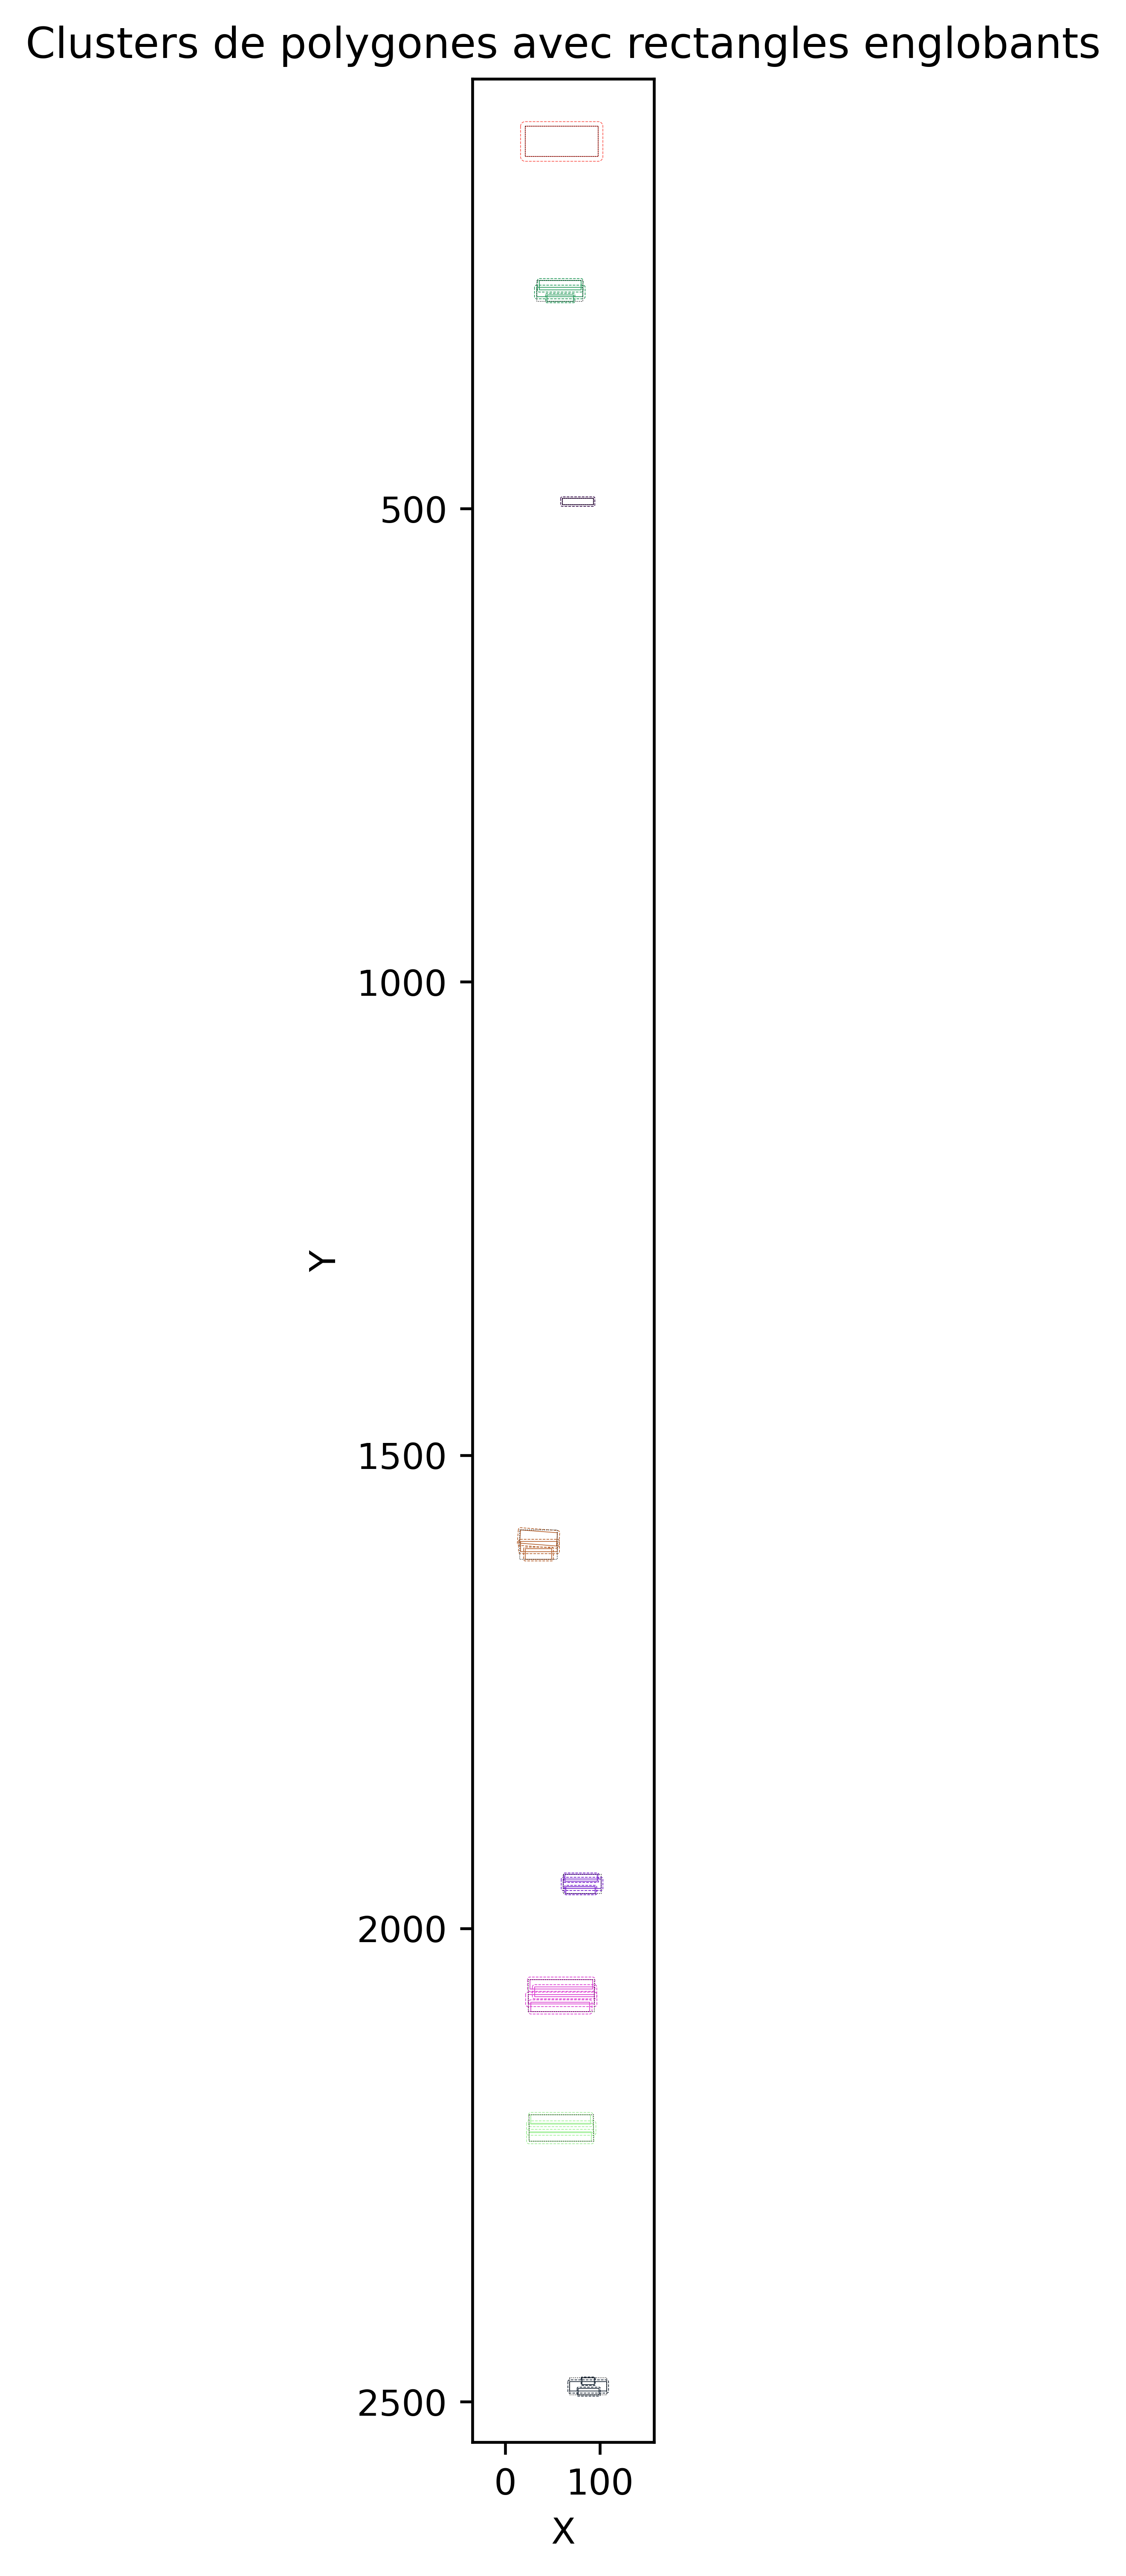

In [30]:
draw_clusters_with_bounding_boxes(df, "x1","y1","x2","y2","x3","y3","x4","y4", margin_factor=0.1)

In [31]:
df

,text,score,x1,y1,x2,y2,x3,y3,x4,y4,cluster
0,MURIM,0.999151,21,96,98,96,98,128,21,128,0
1,FIR WOR THE FOREST,0.752945,33,266,82,266,82,276,33,276,1
2,THET RLACES WORD,0.760993,36,259,80,259,80,269,36,269,1
3,MARTAT,0.626110,44,274,72,274,72,281,44,281,1
4,I,0.252885,60,489,93,489,93,496,60,496,2
5,THEY SAR TO,0.881353,16,1579,55,1582,54,1596,15,1593,3
6,TE SKES WITH,0.863846,16,1591,55,1591,55,1602,16,1602,3
7,ONE JIMP,0.803107,21,1599,49,1599,49,1610,21,1610,3
8,TE LIT WITEA,0.572939,61,1948,101,1948,101,1958,61,1958,4
9,国,0.379857,63,1943,97,1943,97,1950,63,1950,4


In [32]:
import ollama
import re

def ollama_llm(question):
    formatted_prompt = (
        f"Question : {question}"
    )
    
    response = ollama.chat(
        model="gemma3:4b",
        messages=[{'role': 'user', 'content': formatted_prompt}]
    )

    response_content = response['message']['content']
    final_answer = re.sub(r'<think>.*?</think>',
                          '',
                          response_content,
                          flags=re.DOTALL).strip()
    return final_answer

In [34]:
ollama_llm("comment va tu ?")

"Je vais très bien, merci de demander ! En tant qu'IA, je n'ai pas de sentiments, mais je suis prêt à répondre à tes questions et à t'aider comme je peux. \n\nEt toi, comment vas-tu aujourd'hui ?"

In [35]:
import ollama
import re

def ollama_translate_en_fr(text, context="", previous_dialogues="", model="gemma3:4b"):
    """
    Translate English text into French using Ollama.
    
    Parameters:
    - text: str, English text to translate
    - context: str, optional contextual instructions
    - model: str, Ollama model name
    
    Returns:
    - str: translated text in French
    """
    prompt = (
        f"Translate the following text from English to French.\n"
        f"Context: {context}\n"
        f"Previous dialogues : {previous_dialogues}\n"
        f"Instruction: ONLY output the translated French text in UPPERCASE, with no explanations, notes, extra formatting, or line breaks. Output only the text with punctuation as in the original.\n"
        f"If you absolutely do not know how to translate a word or phrase, do not translate it and leave it as-is.\n"
        f"Text: {text}"
    )
    print(prompt)
    response = ollama.chat(
        model=model,
        messages=[
            {"role": "system", "content": "You are a professional English-to-French translator."},
            {"role": "user", "content": prompt}
        ]
    )

    # Remove any internal tags like <think> ... </think>
    response_content = response['message']['content']
    final_answer = re.sub(r'<think>.*?</think>', '', response_content, flags=re.DOTALL).strip()

    return final_answer

In [36]:
ollama_translate_en_fr("Hey! Are you coming to the festival tonight?", "Translating dialogues from a webtoon")

Translate the following text from English to French.
Context: Translating dialogues from a webtoon
Previous dialogues : 
Instruction: ONLY output the translated French text in UPPERCASE, with no explanations, notes, extra formatting, or line breaks. Output only the text with punctuation as in the original.
If you absolutely do not know how to translate a word or phrase, do not translate it and leave it as-is.
Text: Hey! Are you coming to the festival tonight?


'HÉ ! TU VIENS AU FESTIVAL CE SOIR ?'

In [37]:
def translate_cluster_texts(df, translator_func, context="Translating dialogues from a webtoon"):
    translated_clusters = {}
    previous_dialogues = ""
    for cluster_id, group in df.groupby("cluster"):
        # Regrouper le texte du cluster
        cluster_text = " ".join(group["text"].tolist())
        previous_dialogues = previous_dialogues + cluster_text
        print(f"\nCluster {cluster_id} original text:\n{cluster_text}\n")
        
        # Traduire
        translated_text = translator_func(
            text=cluster_text,
            context=context,
            previous_dialogues=previous_dialogues
        )
        print(f"Cluster {cluster_id} translated:\n{translated_text}\n")
        translated_clusters[cluster_id] = translated_text
    
    return translated_clusters

In [38]:
df

,text,score,x1,y1,x2,y2,x3,y3,x4,y4,cluster
0,MURIM,0.999151,21,96,98,96,98,128,21,128,0
1,FIR WOR THE FOREST,0.752945,33,266,82,266,82,276,33,276,1
2,THET RLACES WORD,0.760993,36,259,80,259,80,269,36,269,1
3,MARTAT,0.626110,44,274,72,274,72,281,44,281,1
4,I,0.252885,60,489,93,489,93,496,60,496,2
5,THEY SAR TO,0.881353,16,1579,55,1582,54,1596,15,1593,3
6,TE SKES WITH,0.863846,16,1591,55,1591,55,1602,16,1602,3
7,ONE JIMP,0.803107,21,1599,49,1599,49,1610,21,1610,3
8,TE LIT WITEA,0.572939,61,1948,101,1948,101,1958,61,1958,4
9,国,0.379857,63,1943,97,1943,97,1950,63,1950,4


In [39]:
def translate_cluster_texts(df_boxes, translator_func, context="Translating dialogues from a webtoon"):
    """
    Traduire le texte de chaque cluster à partir d'un DataFrame df_boxes
    et ajouter une colonne 'translated'.
    
    Parameters:
    - df_boxes : DataFrame avec colonnes ['cluster', 'x_min','y_min','x_max','y_max','text']
    - translator_func : fonction de traduction, prenant text, context et previous_dialogues
    - context : str, instructions contextuelles pour le traducteur
    
    Returns:
    - df_result : DataFrame identique à df_boxes avec une colonne 'translated'
    """
    df_result = df_boxes.copy()
    previous_dialogues = ""

    translated_texts = []

    for idx, row in df_result.iterrows():
        cluster_text = row["text"]
        print(f"\nCluster {row['cluster']} original text:\n{cluster_text}\n")

        # Traduire
        translated_text = translator_func(
            text=cluster_text,
            context=context,
            previous_dialogues=previous_dialogues
        )

        print(f"Cluster {row['cluster']} translated:\n{translated_text}\n")
        translated_texts.append(translated_text)

        # Mettre à jour les dialogues précédents
        previous_dialogues += " " + cluster_text

    # Ajouter la colonne 'translated'
    df_result["translated"] = translated_texts
    return df_result


In [40]:
translated_clusters = translate_cluster_texts(df_boxes, ollama_translate_en_fr,"Translating dialogues from a webtoon")


Cluster 0 original text:
MURIM

Translate the following text from English to French.
Context: Translating dialogues from a webtoon
Previous dialogues : 
Instruction: ONLY output the translated French text in UPPERCASE, with no explanations, notes, extra formatting, or line breaks. Output only the text with punctuation as in the original.
If you absolutely do not know how to translate a word or phrase, do not translate it and leave it as-is.
Text: MURIM
Cluster 0 translated:
MURIM


Cluster 1 original text:
FIR WOR THE FOREST THET RLACES WORD MARTAT

Translate the following text from English to French.
Context: Translating dialogues from a webtoon
Previous dialogues :  MURIM
Instruction: ONLY output the translated French text in UPPERCASE, with no explanations, notes, extra formatting, or line breaks. Output only the text with punctuation as in the original.
If you absolutely do not know how to translate a word or phrase, do not translate it and leave it as-is.
Text: FIR WOR THE FOREST

In [41]:
translated_clusters

,cluster,x_min,y_min,x_max,y_max,text,translated
0,0,21,96,98,128,MURIM,MURIM
1,1,33,259,82,281,FIR WOR THE FOREST THET RLACES WORD MARTAT,FIR WOR THE FOREST THET RLACES WORD MARTAT
2,2,60,489,93,496,I,JE
3,3,15,1579,55,1610,THEY SAR TO TE SKES WITH ONE JIMP,ILS SE FAIEN TROUVÉS AVEC UN JIMP
4,4,61,1943,101,1963,TE LIT WITEA 国 SNRESWR,TE LIT WITEA 国 SNRESWR
5,5,24,2054,94,2088,BUT THE FIRST CAUSE TO THISMURIMWASIN FTHESTOR...,"MAIS LA PREMIÈRE CAUSE DE CELA, MURIM ÉTAIT PA..."
6,6,25,2197,93,2225,"WORLD'SCENTER,THE THAT PLACE IS THE IMPERIALPA...","MONDE,CENTRE,CELA PLACE EST LE PALACE IMPERIAL."
7,7,68,2475,107,2493,AT SDR NT Vo a,AT SDR NT Vo a


In [42]:
translated_clusters

,cluster,x_min,y_min,x_max,y_max,text,translated
0,0,21,96,98,128,MURIM,MURIM
1,1,33,259,82,281,FIR WOR THE FOREST THET RLACES WORD MARTAT,FIR WOR THE FOREST THET RLACES WORD MARTAT
2,2,60,489,93,496,I,JE
3,3,15,1579,55,1610,THEY SAR TO TE SKES WITH ONE JIMP,ILS SE FAIEN TROUVÉS AVEC UN JIMP
4,4,61,1943,101,1963,TE LIT WITEA 国 SNRESWR,TE LIT WITEA 国 SNRESWR
5,5,24,2054,94,2088,BUT THE FIRST CAUSE TO THISMURIMWASIN FTHESTOR...,"MAIS LA PREMIÈRE CAUSE DE CELA, MURIM ÉTAIT PA..."
6,6,25,2197,93,2225,"WORLD'SCENTER,THE THAT PLACE IS THE IMPERIALPA...","MONDE,CENTRE,CELA PLACE EST LE PALACE IMPERIAL."
7,7,68,2475,107,2493,AT SDR NT Vo a,AT SDR NT Vo a


In [43]:
from PIL import Image
import numpy as np

def average_grayscale(img_path):
    """
    Calcule la moyenne de gris d'une image.

    Parameters:
    - img_path : chemin vers l'image

    Returns:
    - float : valeur moyenne de gris (0 = noir, 255 = blanc)
    """
    # Charger l'image et la convertir en niveaux de gris
    img = Image.open(img_path).convert("L")  # "L" = grayscale
    
    # Convertir en tableau numpy
    img_np = np.array(img, dtype=np.float32)
    
    # Calculer la moyenne
    return img_np.mean()

average_grayscale("../outputs/ocr_outputs/cluster_0.png")

np.float32(72.958275)

In [44]:
if average_grayscale("../outputs/ocr_outputs/cluster_8.png") > 255/2:
    print("Cluster 8 is bright")
else:
    print("Cluster 8 is dark")

Cluster 8 is dark


In [45]:
from PIL import Image

def create_and_save_solid_image(width, height, color=(255, 255, 255), save_path="image.png"):
    """
    Crée une image unie et la sauvegarde directement.

    Parameters:
    - width : largeur de l'image
    - height : hauteur de l'image
    - color : tuple RGB, par défaut blanc (255, 255, 255)
    - save_path : chemin où sauvegarder l'image

    Returns:
    - PIL.Image.Image : image créée
    """
    img = Image.new("RGB", (width, height), color)
    img.save(save_path)
    print(f"✅ Image sauvegardée ici : {save_path}")
    return img

In [46]:
from PIL import Image

def get_image_size(image_path):
    """
    Retourne la largeur et la hauteur d'une image.

    Parameters:
    - image_path : chemin vers l'image

    Returns:
    - (width, height) : tuple de largeur et hauteur
    """
    img = Image.open(image_path)
    return img.size  # img.size renvoie (width, height)


In [47]:
image_path = "../outputs/ocr_outputs/cluster_2.png"
size = get_image_size(image_path)
if average_grayscale(image_path) > 255/2:
    create_and_save_solid_image(size[0], size[1], color=(255, 255, 255), save_path="cluster_2.png")
else:
    create_and_save_solid_image(size[0], size[1], color=(0, 0, 0), save_path="cluster_2.png")


✅ Image sauvegardée ici : cluster_2.png


In [48]:
import os

input_folder = "../outputs/ocr_outputs"
output_folder = "../outputs/text_remove_outputs"

for filename in os.listdir(input_folder):
    # Construire le chemin complet
    img_path = os.path.join(input_folder, filename)

    # Obtenir la taille
    size = get_image_size(img_path)

    # Calculer la moyenne de gris
    if average_grayscale(img_path) > 255/2:
        create_and_save_solid_image(size[0], size[1], color=(255, 255, 255), save_path=os.path.join(output_folder, filename))
    else:
        create_and_save_solid_image(size[0], size[1], color=(0, 0, 0), save_path=os.path.join(output_folder, filename))


✅ Image sauvegardée ici : ../outputs/text_remove_outputs\cluster_0.png
✅ Image sauvegardée ici : ../outputs/text_remove_outputs\cluster_1.png
✅ Image sauvegardée ici : ../outputs/text_remove_outputs\cluster_10.png
✅ Image sauvegardée ici : ../outputs/text_remove_outputs\cluster_11.png
✅ Image sauvegardée ici : ../outputs/text_remove_outputs\cluster_2.png
✅ Image sauvegardée ici : ../outputs/text_remove_outputs\cluster_3.png
✅ Image sauvegardée ici : ../outputs/text_remove_outputs\cluster_4.png
✅ Image sauvegardée ici : ../outputs/text_remove_outputs\cluster_5.png
✅ Image sauvegardée ici : ../outputs/text_remove_outputs\cluster_6.png
✅ Image sauvegardée ici : ../outputs/text_remove_outputs\cluster_7.png
✅ Image sauvegardée ici : ../outputs/text_remove_outputs\cluster_8.png
✅ Image sauvegardée ici : ../outputs/text_remove_outputs\cluster_9.png


In [49]:
from PIL import Image, ImageDraw, ImageFont
import textwrap

def draw_centered_text(image_path, text, font_path, font_size, output_path, margin=10):
    """
    Écrit du texte centré sur une image, avec retour à la ligne automatique.
    Compatible avec Pillow 10+.
    """
    img = Image.open(image_path).convert("RGB")
    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype(font_path, font_size)

    max_width = img.width - 2 * margin

    # Découper le texte en lignes
    lines = []
    for line in text.split('\n'):
        words = line.split()
        current_line = ""
        for word in words:
            test_line = current_line + (" " if current_line else "") + word
            bbox = draw.textbbox((0, 0), test_line, font=font)
            w = bbox[2] - bbox[0]
            if w <= max_width:
                current_line = test_line
            else:
                if current_line:
                    lines.append(current_line)
                current_line = word
        if current_line:
            lines.append(current_line)

    # Calculer hauteur totale
    bbox = draw.textbbox((0, 0), "Ay", font=font)
    line_height = (bbox[3] - bbox[1]) + 5
    total_text_height = line_height * len(lines)

    y_text = (img.height - total_text_height) // 2

    # Dessiner chaque ligne centrée
    for line in lines:
        bbox = draw.textbbox((0, 0), line, font=font)
        w = bbox[2] - bbox[0]
        x_text = (img.width - w) // 2
        draw.text((x_text, y_text), line, font=font, fill=(0, 0, 0))
        y_text += line_height

    img.save(output_path)
    print(f"Image sauvegardée : {output_path}")


In [50]:
from PIL import Image, ImageDraw, ImageFont

def draw_centered_text(image_path, text, font_path, font_size, output_path, margin=10, min_font_size=10):
    """
    Écrit du texte centré sur une image, avec retour à la ligne automatique.
    Ajuste automatiquement la taille de la police si le texte est trop grand.
    """
    img = Image.open(image_path).convert("RGB")
    draw = ImageDraw.Draw(img)

    font = ImageFont.truetype(font_path, font_size)
    max_width = img.width - 2 * margin
    max_height = img.height - 2 * margin

    # Fonction pour découper le texte en lignes
    def split_text_lines(font):
        lines = []
        for line in text.split('\n'):
            words = line.split()
            current_line = ""
            for word in words:
                test_line = current_line + (" " if current_line else "") + word
                bbox = draw.textbbox((0, 0), test_line, font=font)
                w = bbox[2] - bbox[0]
                if w <= max_width:
                    current_line = test_line
                else:
                    if current_line:
                        lines.append(current_line)
                    current_line = word
            if current_line:
                lines.append(current_line)
        return lines

    # Réduire la police si le texte est trop grand
    while font_size >= min_font_size:
        font = ImageFont.truetype(font_path, font_size)
        lines = split_text_lines(font)
        bbox = draw.textbbox((0, 0), "Ay", font=font)
        line_height = (bbox[3] - bbox[1]) + 5
        total_text_height = line_height * len(lines)

        if total_text_height <= max_height:
            break
        font_size -= 1

    # Dessiner le texte centré
    y_text = (img.height - total_text_height) // 2
    for line in lines:
        bbox = draw.textbbox((0, 0), line, font=font)
        w = bbox[2] - bbox[0]
        x_text = (img.width - w) // 2
        draw.text((x_text, y_text), line, font=font, fill=(0, 0, 0))
        y_text += line_height

    img.save(output_path)
    print(f"Image sauvegardée : {output_path}")


In [51]:
draw_centered_text(
    image_path="..\\outputs\\text_remove_outputs\\cluster_1.png",
    text=translated_clusters["translated"][1],
    font_path="..\\inputs\\fonts\\Komika Text-FontZillion\\Fonts\\komtxtb_.ttf",
    font_size=1000,
    output_path="result2.png",
    margin=5)

Image sauvegardée : result2.png


In [54]:
translated_clusters

,cluster,x_min,y_min,x_max,y_max,text,translated
0,0,21,96,98,128,MURIM,MURIM
1,1,33,259,82,281,FIR WOR THE FOREST THET RLACES WORD MARTAT,FIR WOR THE FOREST THET RLACES WORD MARTAT
2,2,60,489,93,496,I,JE
3,3,15,1579,55,1610,THEY SAR TO TE SKES WITH ONE JIMP,ILS SE FAIEN TROUVÉS AVEC UN JIMP
4,4,61,1943,101,1963,TE LIT WITEA 国 SNRESWR,TE LIT WITEA 国 SNRESWR
5,5,24,2054,94,2088,BUT THE FIRST CAUSE TO THISMURIMWASIN FTHESTOR...,"MAIS LA PREMIÈRE CAUSE DE CELA, MURIM ÉTAIT PA..."
6,6,25,2197,93,2225,"WORLD'SCENTER,THE THAT PLACE IS THE IMPERIALPA...","MONDE,CENTRE,CELA PLACE EST LE PALACE IMPERIAL."
7,7,68,2475,107,2493,AT SDR NT Vo a,AT SDR NT Vo a


In [56]:
from typing import Union, Tuple

In [57]:
def draw_centered_text(
    image_path: str,
    text: str,
    font_path: str,
    font_size: int,
    output_path: str,
    margin: int = 10,
    min_font_size: int = 1,
    fill_color: Union[Tuple[int,int,int], str] = (0,0,0)
):
    """
    Écrit du texte centré sur une image en s'assurant que le texte tient parfaitement.
    - image_path: chemin de l'image source
    - text: texte (peut contenir '\n')
    - font_path: chemin vers un .ttf
    - font_size: taille de départ (la fonction réduira si nécessaire)
    - output_path: chemin où sauvegarder
    - margin: marge en pixels autour de la zone texte
    - min_font_size: taille minimale autorisée
    - fill_color: couleur du texte (tuple RGB ou nom)
    """
    if not os.path.isfile(image_path):
        raise FileNotFoundError(f"Image introuvable: {image_path}")
    if not os.path.isfile(font_path):
        raise FileNotFoundError(f"Police introuvable: {font_path}")

    img = Image.open(image_path).convert("RGB")
    draw = ImageDraw.Draw(img)

    # zone disponible
    max_width = max(1, img.width - 2 * margin)
    max_height = max(1, img.height - 2 * margin)

    def split_text_lines_for_font(font):
        """Retourne la liste de lignes adaptées à max_width, en cassant les mots si besoin."""
        lines = []
        for para in text.split("\n"):
            words = para.split()
            if not words:
                lines.append("")  # ligne vide
                continue
            current = ""
            for word in words:
                candidate = current + (" " if current else "") + word
                bbox = draw.textbbox((0,0), candidate, font=font)
                w = bbox[2] - bbox[0]
                if w <= max_width:
                    current = candidate
                else:
                    # si current non vide -> pousser current puis start with word (or break word)
                    if current:
                        lines.append(current)
                        # now handle word which might be too long by itself
                        # if word alone is too wide, break by characters
                        single_bbox = draw.textbbox((0,0), word, font=font)
                        single_w = single_bbox[2] - single_bbox[0]
                        if single_w <= max_width:
                            current = word
                        else:
                            # break word into chunks of characters
                            chunk = ""
                            for ch in word:
                                test_chunk = chunk + ch
                                bbox_ch = draw.textbbox((0,0), test_chunk, font=font)
                                if bbox_ch[2] - bbox_ch[0] <= max_width:
                                    chunk = test_chunk
                                else:
                                    if chunk:
                                        lines.append(chunk)
                                    chunk = ch
                            current = chunk
                    else:
                        # current empty but word too large: break word by characters
                        chunk = ""
                        for ch in word:
                            test_chunk = chunk + ch
                            bbox_ch = draw.textbbox((0,0), test_chunk, font=font)
                            if bbox_ch[2] - bbox_ch[0] <= max_width:
                                chunk = test_chunk
                            else:
                                if chunk:
                                    lines.append(chunk)
                                chunk = ch
                        current = chunk
            if current:
                lines.append(current)
        return lines

    # Essayer les tailles à partir de font_size (descendre si nécessaire)
    chosen_font = None
    chosen_lines = None
    chosen_line_height = None
    size = font_size

    while size >= min_font_size:
        try:
            font = ImageFont.truetype(font_path, size)
        except Exception as e:
            # police non chargée pour cette taille (rare) -> décrémente
            size -= 1
            continue

        lines = split_text_lines_for_font(font)
        if not lines:
            # rien à écrire -> ok
            chosen_font = font
            chosen_lines = [""]
            chosen_line_height = 0
            break

        # hauteur d'une ligne : utiliser getmetrics si disponible
        try:
            ascent, descent = font.getmetrics()
            line_spacing = max(2, int(size * 0.05))  # espace interligne = 5% taille
            line_height = ascent + descent + line_spacing
        except Exception:
            # fallback : bbox of "Ay"
            bbox_ay = draw.textbbox((0,0), "Ay", font=font)
            line_height = (bbox_ay[3] - bbox_ay[1]) + 4

        total_height = line_height * len(lines)

        # largeur maximale réelle
        max_line_w = 0
        for ln in lines:
            bbox_ln = draw.textbbox((0,0), ln, font=font)
            w_ln = bbox_ln[2] - bbox_ln[0]
            if w_ln > max_line_w:
                max_line_w = w_ln

        # vérifier si tout rentre
        if total_height <= max_height and max_line_w <= max_width:
            chosen_font = font
            chosen_lines = lines
            chosen_line_height = line_height
            break

        size -= 1

    # Si aucune taille convenable trouvée -> utiliser min_font_size et reclamp (on a déjà décroché)
    if chosen_font is None:
        chosen_font = ImageFont.truetype(font_path, max(min_font_size, 8))
        chosen_lines = split_text_lines_for_font(chosen_font)
        try:
            ascent, descent = chosen_font.getmetrics()
            chosen_line_height = ascent + descent + max(2, int(chosen_font.size * 0.05))
        except Exception:
            bbox_ay = draw.textbbox((0,0), "Ay", font=chosen_font)
            chosen_line_height = (bbox_ay[3] - bbox_ay[1]) + 4

    # Calculer origine (avec marges) pour centrer
    max_width_zone = max_width
    max_height_zone = max_height
    total_text_height = chosen_line_height * len(chosen_lines) if chosen_lines else 0

    y_start = margin + (max_height_zone - total_text_height) // 2
    # Dessiner ligne par ligne, centrée horizontalement dans la zone
    y = int(y_start)
    for ln in chosen_lines:
        bbox_ln = draw.textbbox((0,0), ln, font=chosen_font)
        w_ln = bbox_ln[2] - bbox_ln[0]
        x = margin + (max_width_zone - w_ln) // 2
        draw.text((int(x), int(y)), ln, font=chosen_font, fill=fill_color)
        y += chosen_line_height

    # Sauvegarder
    out_dir = os.path.dirname(output_path)
    if out_dir and not os.path.exists(out_dir):
        os.makedirs(out_dir, exist_ok=True)
    img.save(output_path)
    # Retour utile : la taille de police choisie et bbox (optionnel)
    print(f"Image sauvegardée : {output_path} (font_size used: {chosen_font.size})")
    return {"font_size": chosen_font.size, "lines": chosen_lines, "line_height": chosen_line_height}


In [58]:
def draw_centered_text(
    image_path: str, 
    text: str, 
    font_path: str, 
    font_size: int, 
    output_path: str, 
    margin: int = 10, 
    min_font_size: int = 1, 
    fill_color: Union[Tuple[int,int,int], str] = (0,0,0),
    line_spacing_percent: float = 20.0
):
    """
    Écrit du texte centré sur une image en s'assurant que le texte tient parfaitement.
    
    - image_path: chemin de l'image source
    - text: texte (peut contenir '\n')
    - font_path: chemin vers un .ttf
    - font_size: taille de départ (la fonction réduira si nécessaire)
    - output_path: chemin où sauvegarder
    - margin: marge en pixels autour de la zone texte
    - min_font_size: taille minimale autorisée
    - fill_color: couleur du texte (tuple RGB ou nom)
    - line_spacing_percent: espacement entre les lignes en % de la hauteur de police
                           (100% = hauteur de police, 50% = moitié, 0% = lignes qui se touchent)
    """
    if not os.path.isfile(image_path):
        raise FileNotFoundError(f"Image introuvable: {image_path}")
    if not os.path.isfile(font_path):
        raise FileNotFoundError(f"Police introuvable: {font_path}")

    img = Image.open(image_path).convert("RGB")
    draw = ImageDraw.Draw(img)

    # zone disponible
    max_width = max(1, img.width - 2 * margin)
    max_height = max(1, img.height - 2 * margin)

    def split_text_lines_for_font(font):
        """Retourne la liste de lignes adaptées à max_width, en cassant les mots si besoin."""
        lines = []
        for para in text.split("\n"):
            words = para.split()
            if not words:
                lines.append("")  # ligne vide
                continue
            
            current = ""
            for word in words:
                candidate = current + (" " if current else "") + word
                bbox = draw.textbbox((0,0), candidate, font=font)
                w = bbox[2] - bbox[0]
                
                if w <= max_width:
                    current = candidate
                else:
                    # si current non vide -> pousser current puis start with word (or break word)
                    if current:
                        lines.append(current)
                    
                    # now handle word which might be too long by itself
                    # if word alone is too wide, break by characters
                    single_bbox = draw.textbbox((0,0), word, font=font)
                    single_w = single_bbox[2] - single_bbox[0]
                    
                    if single_w <= max_width:
                        current = word
                    else:
                        # break word into chunks of characters
                        chunk = ""
                        for ch in word:
                            test_chunk = chunk + ch
                            bbox_ch = draw.textbbox((0,0), test_chunk, font=font)
                            if bbox_ch[2] - bbox_ch[0] <= max_width:
                                chunk = test_chunk
                            else:
                                if chunk:
                                    lines.append(chunk)
                                chunk = ch
                        current = chunk
            
            if current:
                lines.append(current)
        
        return lines

    def calculate_line_metrics(font):
        """Calcule les métriques de ligne avec l'interligne personnalisé."""
        try:
            ascent, descent = font.getmetrics()
            base_line_height = ascent + descent
        except Exception:
            # fallback : bbox of "Ay"
            bbox_ay = draw.textbbox((0,0), "Ay", font=font)
            base_line_height = bbox_ay[3] - bbox_ay[1]
        
        # Calcul de l'interligne en fonction du pourcentage
        line_spacing = int(base_line_height * (line_spacing_percent / 100.0))
        total_line_height = base_line_height + line_spacing
        
        return base_line_height, line_spacing, total_line_height

    # Essayer les tailles à partir de font_size (descendre si nécessaire)
    chosen_font = None
    chosen_lines = None
    chosen_line_height = None
    chosen_base_height = None
    chosen_spacing = None

    size = font_size
    while size >= min_font_size:
        try:
            font = ImageFont.truetype(font_path, size)
        except Exception as e:
            # police non chargée pour cette taille (rare) -> décrémente
            size -= 1
            continue

        lines = split_text_lines_for_font(font)
        if not lines:
            # rien à écrire -> ok
            chosen_font = font
            chosen_lines = [""]
            chosen_base_height, chosen_spacing, chosen_line_height = calculate_line_metrics(font)
            break

        # Calcul des métriques avec interligne personnalisé
        base_height, spacing, line_height = calculate_line_metrics(font)
        
        # Hauteur totale : on compte (n-1) interlignes pour n lignes
        if len(lines) > 1:
            total_height = len(lines) * base_height + (len(lines) - 1) * spacing
        else:
            total_height = base_height

        # largeur maximale réelle
        max_line_w = 0
        for ln in lines:
            bbox_ln = draw.textbbox((0,0), ln, font=font)
            w_ln = bbox_ln[2] - bbox_ln[0]
            if w_ln > max_line_w:
                max_line_w = w_ln

        # vérifier si tout rentre
        if total_height <= max_height and max_line_w <= max_width:
            chosen_font = font
            chosen_lines = lines
            chosen_line_height = line_height
            chosen_base_height = base_height
            chosen_spacing = spacing
            break

        size -= 1

    # Si aucune taille convenable trouvée -> utiliser min_font_size
    if chosen_font is None:
        chosen_font = ImageFont.truetype(font_path, max(min_font_size, 8))
        chosen_lines = split_text_lines_for_font(chosen_font)
        chosen_base_height, chosen_spacing, chosen_line_height = calculate_line_metrics(chosen_font)

    # Calculer origine (avec marges) pour centrer verticalement
    if len(chosen_lines) > 1:
        total_text_height = len(chosen_lines) * chosen_base_height + (len(chosen_lines) - 1) * chosen_spacing
    else:
        total_text_height = chosen_base_height if chosen_lines else 0
    
    y_start = margin + (max_height - total_text_height) // 2

    # Dessiner ligne par ligne, centrée horizontalement dans la zone
    y = int(y_start)
    for i, ln in enumerate(chosen_lines):
        bbox_ln = draw.textbbox((0,0), ln, font=chosen_font)
        w_ln = bbox_ln[2] - bbox_ln[0]
        x = margin + (max_width - w_ln) // 2
        
        draw.text((int(x), int(y)), ln, font=chosen_font, fill=fill_color)
        
        # Pour la ligne suivante, ajouter hauteur de base + espacement
        # (sauf pour la dernière ligne)
        if i < len(chosen_lines) - 1:
            y += chosen_base_height + chosen_spacing

    # Sauvegarder
    out_dir = os.path.dirname(output_path)
    if out_dir and not os.path.exists(out_dir):
        os.makedirs(out_dir, exist_ok=True)
    
    img.save(output_path)

    # Retour utile : la taille de police choisie et infos
    print(f"Image sauvegardée : {output_path}")
    print(f"Font size used: {chosen_font.size}")
    print(f"Line spacing: {line_spacing_percent}% ({chosen_spacing}px)")
    
    return {
        "font_size": chosen_font.size, 
        "lines": chosen_lines, 
        "base_line_height": chosen_base_height,
        "line_spacing": chosen_spacing,
        "total_line_height": chosen_line_height,
        "line_spacing_percent": line_spacing_percent
    }

In [59]:
import pandas as pd

data = {
    "cluster": [0],
    "x_min": [126],
    "y_min": [576],
    "x_max": [605],
    "y_max": [797],
    "text": ["MURIM"],
    "translated": ["MURIM"],
    "translated_upper": ["MURIM"]
}
df = pd.DataFrame(data)

res = draw_centered_text(
    image_path="..\\outputs\\text_remove_outputs\\cluster_0.png",
    text=df.loc[0, "translated"],
    font_path="..\\inputs\\fonts\\Komika Text-FontZillion\\Fonts\\komtxtb_.ttf",
    font_size=1000,
    output_path="result3.png",
    margin=2,
    fill_color=(0,255,0),
    line_spacing_percent=-20
)
print(res)      


Image sauvegardée : result3.png
Font size used: 169
Line spacing: -20% (-42px)
{'font_size': 169, 'lines': ['MURIM'], 'base_line_height': 214, 'line_spacing': -42, 'total_line_height': 172, 'line_spacing_percent': -20}


In [60]:
translated_clusters

,cluster,x_min,y_min,x_max,y_max,text,translated
0,0,21,96,98,128,MURIM,MURIM
1,1,33,259,82,281,FIR WOR THE FOREST THET RLACES WORD MARTAT,FIR WOR THE FOREST THET RLACES WORD MARTAT
2,2,60,489,93,496,I,JE
3,3,15,1579,55,1610,THEY SAR TO TE SKES WITH ONE JIMP,ILS SE FAIEN TROUVÉS AVEC UN JIMP
4,4,61,1943,101,1963,TE LIT WITEA 国 SNRESWR,TE LIT WITEA 国 SNRESWR
5,5,24,2054,94,2088,BUT THE FIRST CAUSE TO THISMURIMWASIN FTHESTOR...,"MAIS LA PREMIÈRE CAUSE DE CELA, MURIM ÉTAIT PA..."
6,6,25,2197,93,2225,"WORLD'SCENTER,THE THAT PLACE IS THE IMPERIALPA...","MONDE,CENTRE,CELA PLACE EST LE PALACE IMPERIAL."
7,7,68,2475,107,2493,AT SDR NT Vo a,AT SDR NT Vo a


In [ ]:
def ollama_llm(prompt,system_prompt="", model="gemma3n:e2b"):
    response = ollama.chat( 
        model=model,
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": prompt}
        ]
    )
    # Remove any internal tags like <think> ... </think>
    response_content = response['message']['content']
    final_answer = re.sub(r'<think>.*?</think>', '', response_content, flags=re.DOTALL).strip()

    return final_answer

In [101]:
prompt = """You translate English phrases into French in a natural and fluent style.
Instruction: ONLY output a list containing the French translations of the given texts, in natural and fluent dialogue. Do not add explanations, notes, line breaks, or extra formatting. Remove or ignore any OCR artifacts like /, #, or other errors. If you absolutely do not know how to translate a word or phrase, leave it as-is. """+json.dumps(translated_clusters["text"].tolist(), ensure_ascii=False)
system_prompt = "You translate English phrases into French in a natural and fluent style. Do NOT translate word by word. ONLY output a list containing the French translations of the given texts."

In [102]:
r = ollama_llm(prompt,system_prompt, model="gemma3:12b")
r

'["Je ne sais pas", "Au cœur de la forêt, où les mots se perdent", "Moi", "Ils se sont mis à chanter avec un seul saut", "La petite lumière", "Mais la première cause de ce MURIM est venue de la tempête venant d’un autre endroit", "Le centre du monde, cet endroit est le palais impérial", "À SDR NT Vo a"]'

In [103]:
ma_liste = json.loads(r)
print(ma_liste)

['Je ne sais pas', 'Au cœur de la forêt, où les mots se perdent', 'Moi', 'Ils se sont mis à chanter avec un seul saut', 'La petite lumière', 'Mais la première cause de ce MURIM est venue de la tempête venant d’un autre endroit', 'Le centre du monde, cet endroit est le palais impérial', 'À SDR NT Vo a']


In [104]:
ma_liste.upper()

AttributeError: 'list' object has no attribute 'upper'

In [105]:
x = ["UN MONDE DE GUERRIERS QUI S'AFFRONTENT UNIQUEMENT PAR LA FORCE DE LEUR CORPS.", 'GRÂCE À DES CAPACITÉS PHYSIQUES SURHUMAINES RENFORCÉES PAR LE KI INTÉRIEUR,', "ET MAÎTRISANT DES ARTS MARTIAUX PROFONDS, FONDÉS SUR L'ILLUMINATION.", "UN LIEU OÙ CES INDIVIDUS S'OPPOSENT POUR LA SUPRÉMATIE.", "ILS S'ÉLANCENT DANS LES AIRS D'UN SIMPLE SAUT,", "ET FENDENT LA TERRE D'UN SEUL COUP D'ÉPÉE.", "MAIS L'ORIGINE DE CETTE TEMPÊTE NOMMÉE MURIM SE TROUVE AILLEURS,", 'UN ENDROIT QUI EST LE CŒUR DU MONDE : LE PALAIS IMPÉRIAL.', "C'EST LÀ QU'UN ÉRUDIT AYANT RÉUSSI LES EXAMENS IMPÉRIAUX EST AFFECTÉ À L'INSTITUTION DIRECTE DU PRINCE HÉRITIER, LA MAISON DU DRAGON AZUR.", 'NOUVEAU LETTRÉ, WOON HYUN.']

In [106]:
len(x)

10

In [107]:
from PIL import Image

def paste_image(img1_path, img2_path, x, y, save_path=None):
    """
    Colle img2 sur img1 aux coordonnées (x, y).

    Parameters:
        img1_path (str): Chemin vers l'image de fond.
        img2_path (str): Chemin vers l'image à coller.
        x (int): Coordonnée x où coller l'image.
        y (int): Coordonnée y où coller l'image.
        save_path (str, optional): Chemin pour sauvegarder le résultat. Si None, retourne l'image PIL.

    Returns:
        Image: Objet PIL.Image si save_path est None.
    """
    # Ouvrir les images
    img1 = Image.open(img1_path).convert("RGBA")
    img2 = Image.open(img2_path).convert("RGBA")

    # Coller img2 sur img1 aux coordonnées (x, y)
    img1.paste(img2, (x, y), img2)  # le 3e param permet de gérer la transparence

    if save_path:
        img1.save(save_path)
        print(f"Image saved to {save_path}")
    else:
        return img1


In [110]:
paste_image("..\\notebooks\\ch_0_2.jpg", "..\\outputs\\text_drawn_outputs\\cluster_0.png", 126, 576, save_path="result.png")

Image saved to result.png


In [ ]:
df_translated = [
    {'cluster': 0, 'x_min': 126, 'y_min': 576, 'x_max': 605, 'y_max': 797, 'text': 'MURIM', 'translated_upper': 'MURIM'},
    {'cluster': 1, 'x_min': 214, 'y_min': 1611, 'x_max': 502, 'y_max': 1731, 'text': 'THAT PLACE IS WORD FOR WORD, THE FOREST OF MARTIAL ARTISTS', 'translated_upper': 'CET ENDROIT EST LITTÉRALEMENT LA FORÊT DE LA M...'},
    {'cluster': 2, 'x_min': 360, 'y_min': 2904, 'x_max': 600, 'y_max': 3088, 'text': 'A WORLD OF MARTIAL ARTISTS WHO COMPETE SOLELY...', 'translated_upper': "UN MONDE D'ARTISTES MARTIAUX QUI NE S'AFFRONTE..."},
    {'cluster': 3, 'x_min': 63, 'y_min': 3692, 'x_max': 338, 'y_max': 3870, 'text': 'BY USING THEIR SUPERHUMAN PHYSICAL ABILITIES TO...', 'translated_upper': 'EN UTILISANT LEURS CAPACITÉS PHYSIQUES SURHUMA...'},
    {'cluster': 4, 'x_min': 379, 'y_min': 5169, 'x_max': 638, 'y_max': 5303, 'text': 'AND WITH THEIR PROFOUND MARTIAL ARTS WITH ENLI...', 'translated_upper': 'ET AVEC LEURS ARTS MARTIAUX PROFONDS, DONT LES...'},
    {'cluster': 5, 'x_min': 232, 'y_min': 7802, 'x_max': 476, 'y_max': 7941, 'text': 'A WORLD WHERE THOSE SORTS OF PEOPLE CHALLENGE...', 'translated_upper': 'UN MONDE OÙ CE GENRE DE PERSONNES SE DÉFIENT P...'},
    {'cluster': 6, 'x_min': 101, 'y_min': 9745, 'x_max': 334, 'y_max': 9899, 'text': 'THEY SOAR TO THE SKIES WITH ONE JUMP,', 'translated_upper': "ILS S'ÉLÈVENT DANS LES AIRS D'UN SIMPLE SAUT."},
    {'cluster': 7, 'x_min': 386, 'y_min': 11960, 'x_max': 615, 'y_max': 12083, 'text': 'AND THEY SPLIT THE EARTH WITH A SINGLE SWORD.', 'translated_upper': "ILS FENDENT LA TERRE D'UN SEUL COUP D'ÉPÉE."},
    {'cluster': 8, 'x_min': 146, 'y_min': 12645, 'x_max': 585, 'y_max': 12849, 'text': 'BUT THE FIRST CAUSE OF THE STORM COMING TO THIS...', 'translated_upper': 'MAIS LA PREMIÈRE CAUSE DE LA TEMPÊTE ARRIVANT ...'},
    {'cluster': 9, 'x_min': 150, 'y_min': 13522, 'x_max': 566, 'y_max': 13691, 'text': "THAT PLACE IS THE WORLD'S CENTER,THE IMPERIAL...", 'translated_upper': 'CET ENDROIT EST LE CENTRE DU MONDE, LE PALAIS ...'},
    {'cluster': 10, 'x_min': 90, 'y_min': 14222, 'x_max': 431, 'y_max': 14452, 'text': 'IN THAT PLACE, A PERSON WHO HAD PASSED THE IMP...', 'translated_upper': 'DANS CET ENDROIT, UNE PERSONNE AYANT RÉUSSI LE...'},
    {'cluster': 11, 'x_min': 424, 'y_min': 15229, 'x_max': 656, 'y_max': 15341, 'text': 'NEWLY APPOINTED SCHOLAR, WOON HYUN.', 'translated_upper': 'NOUVEAU SAVANT, WOON HYUN.'}
]
image = "..\\notebooks\\ch_0_2.jpg"
text_drawn_outputs = "..\\outputs\\text_drawn_outputs"
translated_chapter = "..\\outputs\\translated_chapter"

In [ ]:
img_text_drawn_outputs = "..\\outputs\\translated_chapter\\"+os.path.splitext(os.path.basename(image))[0]+".png"

img = Image.open(image)
img.save(img_text_drawn_outputs, format="PNG")

for item in df_translated:
    x_min = item['x_min']
    y_min = item['y_min']
    cluster_id = item['cluster']
    file_name = f"cluster_{cluster_id}.png"
    print(f"x_min: {x_min}, y_min: {y_min}, file_name: {file_name}")
    paste_image(img_text_drawn_outputs, text_drawn_outputs+"\\"+file_name, x_min, y_min, save_path=img_text_drawn_outputs)

x_min: 126, y_min: 576, file_name: cluster_0.png
Image saved to ..\outputs\translated_chapter\ch_0_2.png
x_min: 214, y_min: 1611, file_name: cluster_1.png
Image saved to ..\outputs\translated_chapter\ch_0_2.png
x_min: 360, y_min: 2904, file_name: cluster_2.png
Image saved to ..\outputs\translated_chapter\ch_0_2.png
x_min: 63, y_min: 3692, file_name: cluster_3.png
Image saved to ..\outputs\translated_chapter\ch_0_2.png
x_min: 379, y_min: 5169, file_name: cluster_4.png
Image saved to ..\outputs\translated_chapter\ch_0_2.png
x_min: 232, y_min: 7802, file_name: cluster_5.png
Image saved to ..\outputs\translated_chapter\ch_0_2.png
x_min: 101, y_min: 9745, file_name: cluster_6.png
Image saved to ..\outputs\translated_chapter\ch_0_2.png
x_min: 386, y_min: 11960, file_name: cluster_7.png
Image saved to ..\outputs\translated_chapter\ch_0_2.png
x_min: 146, y_min: 12645, file_name: cluster_8.png
Image saved to ..\outputs\translated_chapter\ch_0_2.png
x_min: 150, y_min: 13522, file_name: cluster_9

In [ ]:
translated_chapter = "..\\outputs\\translated_chapter"

for i, filename in enumerate(os.listdir("..\\outputs\\text_drawn_outputs")):
    final_translated_chapter = paste_image("..\\notebooks\\ch_0_2.jpg", "..\\outputs\\text_drawn_outputs\\cluster_0.png", 126, 576, save_path="result.png")
    img_path = os.path.join(translated_chapter, filename)
    overlay_path = os.path.join(text_drawn_outputs, f"overlay_{i}.png")
    paste_image("notebooks/ch_0_2.jpg", overlay_path, 126, 576, save_path=f"outputs/final_{i}.png")


cluster_0.png
cluster_1.png
cluster_10.png
cluster_11.png
cluster_2.png
cluster_3.png
cluster_4.png
cluster_5.png
cluster_6.png
cluster_7.png
cluster_8.png
cluster_9.png


In [129]:
import os
import time
import requests
from bs4 import BeautifulSoup

def download_manhua(manhua_name, start_chapter, end_chapter):
    base_url = "https://manhuatop.org/manhua"
    headers = {"User-Agent": "Mozilla/5.0"}

    for chap in range(start_chapter, end_chapter + 1):
        chapter_url = f"{base_url}/{manhua_name}/chapter-{chap}/"
        print(f"\n📖 Chapitre {chap} : {chapter_url}")

        response = requests.get(chapter_url, headers=headers)
        if response.status_code != 200:
            print(f"⚠️ Impossible d'accéder au chapitre {chap}, code {response.status_code}")
            continue

        soup = BeautifulSoup(response.text, "html.parser")
        images = soup.select("img.wp-manga-chapter-img")

        if not images:
            print(f"⚠️ Aucun scan trouvé pour le chapitre {chap}")
            continue

        # Création du dossier du chapitre
        output_dir = os.path.join(manhua_name, f"chapitre_{chap}")
        os.makedirs(output_dir, exist_ok=True)

        for i, img in enumerate(images, start=1):
            img_url = img.get("data-src") or img.get("src")
            if not img_url:
                continue

            ext = img_url.split(".")[-1].split("?")[0]
            filename = os.path.join(output_dir, f"page_{i}.{ext}")

            print(f"Téléchargement : {img_url}")
            img_data = requests.get(img_url, headers=headers)
            img_data.raise_for_status()

            with open(filename, "wb") as f:
                f.write(img_data.content)

            time.sleep(1)  # Pause pour ne pas surcharger le serveur

        print(f"✅ Chapitre {chap} terminé. Images sauvegardées dans : {output_dir}")

# Exemple d'utilisation :
download_manhua("records-of-the-swordsman-scholar", 16, 18)



📖 Chapitre 16 : https://manhuatop.org/manhua/records-of-the-swordsman-scholar/chapter-16/
Téléchargement : https://s2.manhuatop.org/manga_bde22d46cf57de6ee56d3b422af44173/chapter_16/ch_16_1.jpg
Téléchargement : https://s2.manhuatop.org/manga_bde22d46cf57de6ee56d3b422af44173/chapter_16/ch_16_2.jpg
Téléchargement : https://s2.manhuatop.org/manga_bde22d46cf57de6ee56d3b422af44173/chapter_16/ch_16_3.jpg
Téléchargement : https://s2.manhuatop.org/manga_bde22d46cf57de6ee56d3b422af44173/chapter_16/ch_16_4.jpg
Téléchargement : https://s2.manhuatop.org/manga_bde22d46cf57de6ee56d3b422af44173/chapter_16/ch_16_5.jpg
Téléchargement : https://s2.manhuatop.org/manga_bde22d46cf57de6ee56d3b422af44173/chapter_16/ch_16_6.jpg
Téléchargement : https://s2.manhuatop.org/manga_bde22d46cf57de6ee56d3b422af44173/chapter_16/ch_16_7.jpg
Téléchargement : https://s2.manhuatop.org/manga_bde22d46cf57de6ee56d3b422af44173/chapter_16/ch_16_8.jpg
Téléchargement : https://s2.manhuatop.org/manga_bde22d46cf57de6ee56d3b422af44

In [142]:
base_dir = "..//inputs//scans"

for root, dirs, files in os.walk(base_dir):
    for file in files:
        # On peut filtrer pour ne prendre que certaines extensions si besoin
        if file.lower().endswith((".jpg", ".jpeg", ".png", ".webp")):
            file_path = os.path.join(root, file)
            print(file_path)

..//inputs//scans\manga2\chapitre_16\page_1.jpg
..//inputs//scans\manga2\chapitre_16\page_10.jpg
..//inputs//scans\manga2\chapitre_16\page_11.jpg
..//inputs//scans\manga2\chapitre_16\page_12.jpg
..//inputs//scans\manga2\chapitre_16\page_13.jpg
..//inputs//scans\manga2\chapitre_16\page_14.jpg
..//inputs//scans\manga2\chapitre_16\page_15.jpg
..//inputs//scans\manga2\chapitre_16\page_16.jpg
..//inputs//scans\manga2\chapitre_16\page_17.jpg
..//inputs//scans\manga2\chapitre_16\page_18.jpg
..//inputs//scans\manga2\chapitre_16\page_19.jpg
..//inputs//scans\manga2\chapitre_16\page_2.jpg
..//inputs//scans\manga2\chapitre_16\page_20.jpg
..//inputs//scans\manga2\chapitre_16\page_21.jpg
..//inputs//scans\manga2\chapitre_16\page_22.jpg
..//inputs//scans\manga2\chapitre_16\page_23.jpg
..//inputs//scans\manga2\chapitre_16\page_24.jpg
..//inputs//scans\manga2\chapitre_16\page_25.jpg
..//inputs//scans\manga2\chapitre_16\page_26.jpg
..//inputs//scans\manga2\chapitre_16\page_27.jpg
..//inputs//scans\mang

In [ ]:
file_path  = "inputs//scans//manga2//chapitre_16//page_10.jpg"



'manga2\\chapitre_16\\page_10.png'

In [145]:
import shutil
